In [1]:
# standard and user-defined functions imports
import pandas as pd
import numpy as np
import wrangle
import explore
import regression_models as model
import os

# visualization imports
import matplotlib.pyplot as plt
import seaborn as sns

# stats and modeling imports
from scipy import stats
from math import sqrt
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,explained_variance_score, r2_score
from sklearn.linear_model import LinearRegression,LassoLars,TweedieRegressor
from sklearn.feature_selection import SelectKBest, RFE, f_regression

# remove warnings
import warnings
warnings.filterwarnings("ignore")
sns.set_theme()

In [2]:
df = pd.read_csv('stressors.csv')

In [3]:
df = df.drop(columns='Unnamed: 0')

In [4]:
df

,State,varroa_mites (% of infected hives),other_pests_and_parasites (%),diseases(%),pesticides(%),other(%),unknown(%),year
0,Alabama,10.0,5.4,0.0,2.2,9.1,9.4,2015-Q1
1,Arizona,26.9,20.5,0.1,0.0,1.8,3.1,2015-Q1
2,Arkansas,17.6,11.4,1.5,3.4,1.0,1.0,2015-Q1
3,California,24.7,7.2,3.0,7.5,6.5,2.8,2015-Q1
4,Colorado,14.6,0.9,1.8,0.6,2.6,5.9,2015-Q1
...,...,...,...,...,...,...,...,...
1346,Virginia,30.8,21.7,0.9,0.6,18.1,1.7,2022-Q2
1347,Washington,50.8,7.3,4.3,3.4,14.2,1.6,2022-Q2
1348,West Virginia,13.1,7.4,3.6,0.0,1.0,0.9,2022-Q2
1349,Wisconsin,27.0,14.6,4.9,11.8,9.6,6.0,2022-Q2


In [5]:
df = pd.read_csv('bee_stress.csv')

In [6]:
df

,state,start_date,end_date,starting_colonies,max_colonies,lost_colonies,percent_lost,added_colonies,renovated_colonies,percent_renovated,varroa_mites,other_parasites,diseases,pesticides,other,unknown
0,Alabama,2015-01-01,2015-03-31,"7,000","7,000","1,800",26,"2,800",250,4,10.0,5.4,(Z),2.2,9.1,9.4
1,Arizona,2015-01-01,2015-03-31,"35,000","35,000","4,600",13,"3,400","2,100",6,26.9,20.5,0.1,(Z),1.8,3.1
2,Arkansas,2015-01-01,2015-03-31,"13,000","14,000","1,500",11,"1,200",90,1,17.6,11.4,1.5,3.4,1.0,1.0
3,California,2015-01-01,2015-03-31,"1,440,000","1,690,000","255,000",15,"250,000","124,000",7,24.7,7.2,3.0,7.5,6.5,2.8
4,Colorado,2015-01-01,2015-03-31,"3,500","12,500","1,500",12,200,140,1,14.6,0.9,1.8,0.6,2.6,5.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1358,West Virginia,2022-04-01,2022-06-30,"5,000","7,500",260,3,"2,400","2,600",35,13.1,7.4,3.6,0.0,1.0,0.9
1359,Wisconsin,2022-04-01,2022-06-30,"52,000","62,000","1,600",3,"6,000","1,300",2,27.0,14.6,4.9,11.8,9.6,6.0
1360,Wyoming,2022-04-01,2022-06-30,"8,000","23,000","1,900",8,"4,500","1,800",8,5.6,2.5,5.1,0.0,3.0,1.0
1361,Other St,2022-04-01,2022-06-30,"4,390","4,690",120,3,900,400,9,7.9,3.8,4.5,2.1,3.0,4.1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1363 entries, 0 to 1362
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   state               1363 non-null   object
 1   start_date          1363 non-null   object
 2   end_date            1363 non-null   object
 3   starting_colonies   1363 non-null   object
 4   max_colonies        1363 non-null   object
 5   lost_colonies       1363 non-null   object
 6   percent_lost        1363 non-null   int64 
 7   added_colonies      1363 non-null   object
 8   renovated_colonies  1363 non-null   object
 9   percent_renovated   1363 non-null   object
 10  varroa_mites        1363 non-null   object
 11  other_parasites     1363 non-null   object
 12  diseases            1363 non-null   object
 13  pesticides          1363 non-null   object
 14  other               1363 non-null   object
 15  unknown             1363 non-null   object
dtypes: int64(1), object(15)


In [8]:
df.state = df.state.str.strip()

In [9]:
df.state = df.state.str.lower().str.replace(' ','_')

In [10]:
df.state.value_counts()

alabama           29
south_dakota      29
new_mexico        29
new_york          29
north_carolina    29
north_dakota      29
ohio              29
oklahoma          29
oregon            29
pennsylvania      29
south_carolina    29
tennessee         29
nebraska          29
texas             29
utah              29
vermont           29
virginia          29
washington        29
west_virginia     29
wisconsin         29
wyoming           29
other_st          29
new_jersey        29
montana           29
arizona           29
indiana           29
arkansas          29
california        29
colorado          29
connecticut       29
florida           29
georgia           29
hawaii            29
idaho             29
illinois          29
iowa              29
missouri          29
kansas            29
kentucky          29
louisiana         29
maine             29
maryland          29
massachusetts     29
michigan          29
minnesota         29
mississippi       29
united_states     29
Name: state, 

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1363 entries, 0 to 1362
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   state               1363 non-null   object
 1   start_date          1363 non-null   object
 2   end_date            1363 non-null   object
 3   starting_colonies   1363 non-null   object
 4   max_colonies        1363 non-null   object
 5   lost_colonies       1363 non-null   object
 6   percent_lost        1363 non-null   int64 
 7   added_colonies      1363 non-null   object
 8   renovated_colonies  1363 non-null   object
 9   percent_renovated   1363 non-null   object
 10  varroa_mites        1363 non-null   object
 11  other_parasites     1363 non-null   object
 12  diseases            1363 non-null   object
 13  pesticides          1363 non-null   object
 14  other               1363 non-null   object
 15  unknown             1363 non-null   object
dtypes: int64(1), object(15)


In [12]:
df.starting_colonies = df.starting_colonies.str.replace(',','').astype(int)

In [13]:
df.max_colonies = df.max_colonies.str.replace(',','').str.strip().astype(int)

In [14]:
df.lost_colonies = df.lost_colonies.str.strip().str.replace(',','').astype(int)

In [15]:
df.percent_lost = df.percent_lost.astype(int)

In [16]:
df.added_colonies = df.added_colonies.str.replace(',','').astype(int)

In [17]:
df.renovated_colonies = df.renovated_colonies.str.replace(',','').astype(int)

In [18]:
df.percent_renovated = df.percent_renovated.str.replace('(','').str.replace(')','').str.replace('Z','0').astype(int)

In [19]:
df.varroa_mites = df.varroa_mites.str.replace('(','').str.replace(')','').str.replace('Z','0').astype(float)

In [20]:
df.other_parasites = df.other_parasites.str.replace('(','').str.replace(')','').str.replace('Z','0').astype(float)

In [21]:
df.diseases = df.diseases.str.replace('(','').str.replace(')','').str.replace('Z','0').astype(float)

In [22]:
df.pesticides = df.pesticides.str.replace('(','').str.replace(')','').str.replace('Z','0').astype(float)

In [23]:
df.other = df.other.str.replace('(','').str.replace(')','').str.replace('Z','0').astype(float)

In [24]:
df.unknown = df.unknown.str.replace('(','').str.replace(')','').str.replace('Z','0').astype(float)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1363 entries, 0 to 1362
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   state               1363 non-null   object 
 1   start_date          1363 non-null   object 
 2   end_date            1363 non-null   object 
 3   starting_colonies   1363 non-null   int64  
 4   max_colonies        1363 non-null   int64  
 5   lost_colonies       1363 non-null   int64  
 6   percent_lost        1363 non-null   int64  
 7   added_colonies      1363 non-null   int64  
 8   renovated_colonies  1363 non-null   int64  
 9   percent_renovated   1363 non-null   int64  
 10  varroa_mites        1363 non-null   float64
 11  other_parasites     1363 non-null   float64
 12  diseases            1363 non-null   float64
 13  pesticides          1363 non-null   float64
 14  other               1363 non-null   float64
 15  unknown             1363 non-null   float64
dtypes: flo

In [26]:
df.start_date = pd.to_datetime(df.start_date)

In [27]:
df.end_date = pd.to_datetime(df.end_date)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1363 entries, 0 to 1362
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   state               1363 non-null   object        
 1   start_date          1363 non-null   datetime64[ns]
 2   end_date            1363 non-null   datetime64[ns]
 3   starting_colonies   1363 non-null   int64         
 4   max_colonies        1363 non-null   int64         
 5   lost_colonies       1363 non-null   int64         
 6   percent_lost        1363 non-null   int64         
 7   added_colonies      1363 non-null   int64         
 8   renovated_colonies  1363 non-null   int64         
 9   percent_renovated   1363 non-null   int64         
 10  varroa_mites        1363 non-null   float64       
 11  other_parasites     1363 non-null   float64       
 12  diseases            1363 non-null   float64       
 13  pesticides          1363 non-null   float64     

In [29]:
df_us = df[df.state=='united_states']

In [30]:
df_us.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 46 to 1362
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   state               29 non-null     object        
 1   start_date          29 non-null     datetime64[ns]
 2   end_date            29 non-null     datetime64[ns]
 3   starting_colonies   29 non-null     int64         
 4   max_colonies        29 non-null     int64         
 5   lost_colonies       29 non-null     int64         
 6   percent_lost        29 non-null     int64         
 7   added_colonies      29 non-null     int64         
 8   renovated_colonies  29 non-null     int64         
 9   percent_renovated   29 non-null     int64         
 10  varroa_mites        29 non-null     float64       
 11  other_parasites     29 non-null     float64       
 12  diseases            29 non-null     float64       
 13  pesticides          29 non-null     float64      

In [31]:
df_states = df[df.state != 'united_states']

In [32]:
df_states.head(3)

,state,start_date,end_date,starting_colonies,max_colonies,lost_colonies,percent_lost,added_colonies,renovated_colonies,percent_renovated,varroa_mites,other_parasites,diseases,pesticides,other,unknown
0,alabama,2015-01-01,2015-03-31,7000,7000,1800,26,2800,250,4,10.0,5.4,0.0,2.2,9.1,9.4
1,arizona,2015-01-01,2015-03-31,35000,35000,4600,13,3400,2100,6,26.9,20.5,0.1,0.0,1.8,3.1
2,arkansas,2015-01-01,2015-03-31,13000,14000,1500,11,1200,90,1,17.6,11.4,1.5,3.4,1.0,1.0


In [33]:
def ts_split(df):
    '''This function takes in the dataframe and splits it into train and test by year. Train is data up to and 
        including 2019 and test is 2020-2022. The function returns two dataframes: train and test.'''
    # split dataframe at the end of 2019 and save into train    
    train = df[df['end_date'].dt.year <= 2019]
    # save the rest of the dataframe into test
    test = df[df['end_date'].dt.year > 2019]
    return train, test

In [34]:
train, test = ts_split(df_states)

In [35]:
train.shape, test.shape

((874, 16), (460, 16))

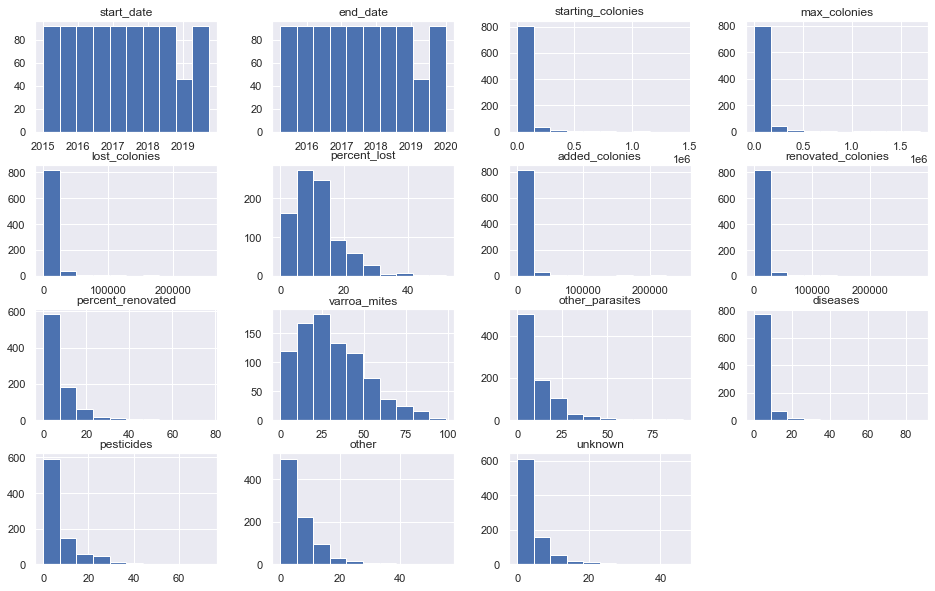

In [36]:
train.hist(figsize=[16,10])
plt.show()

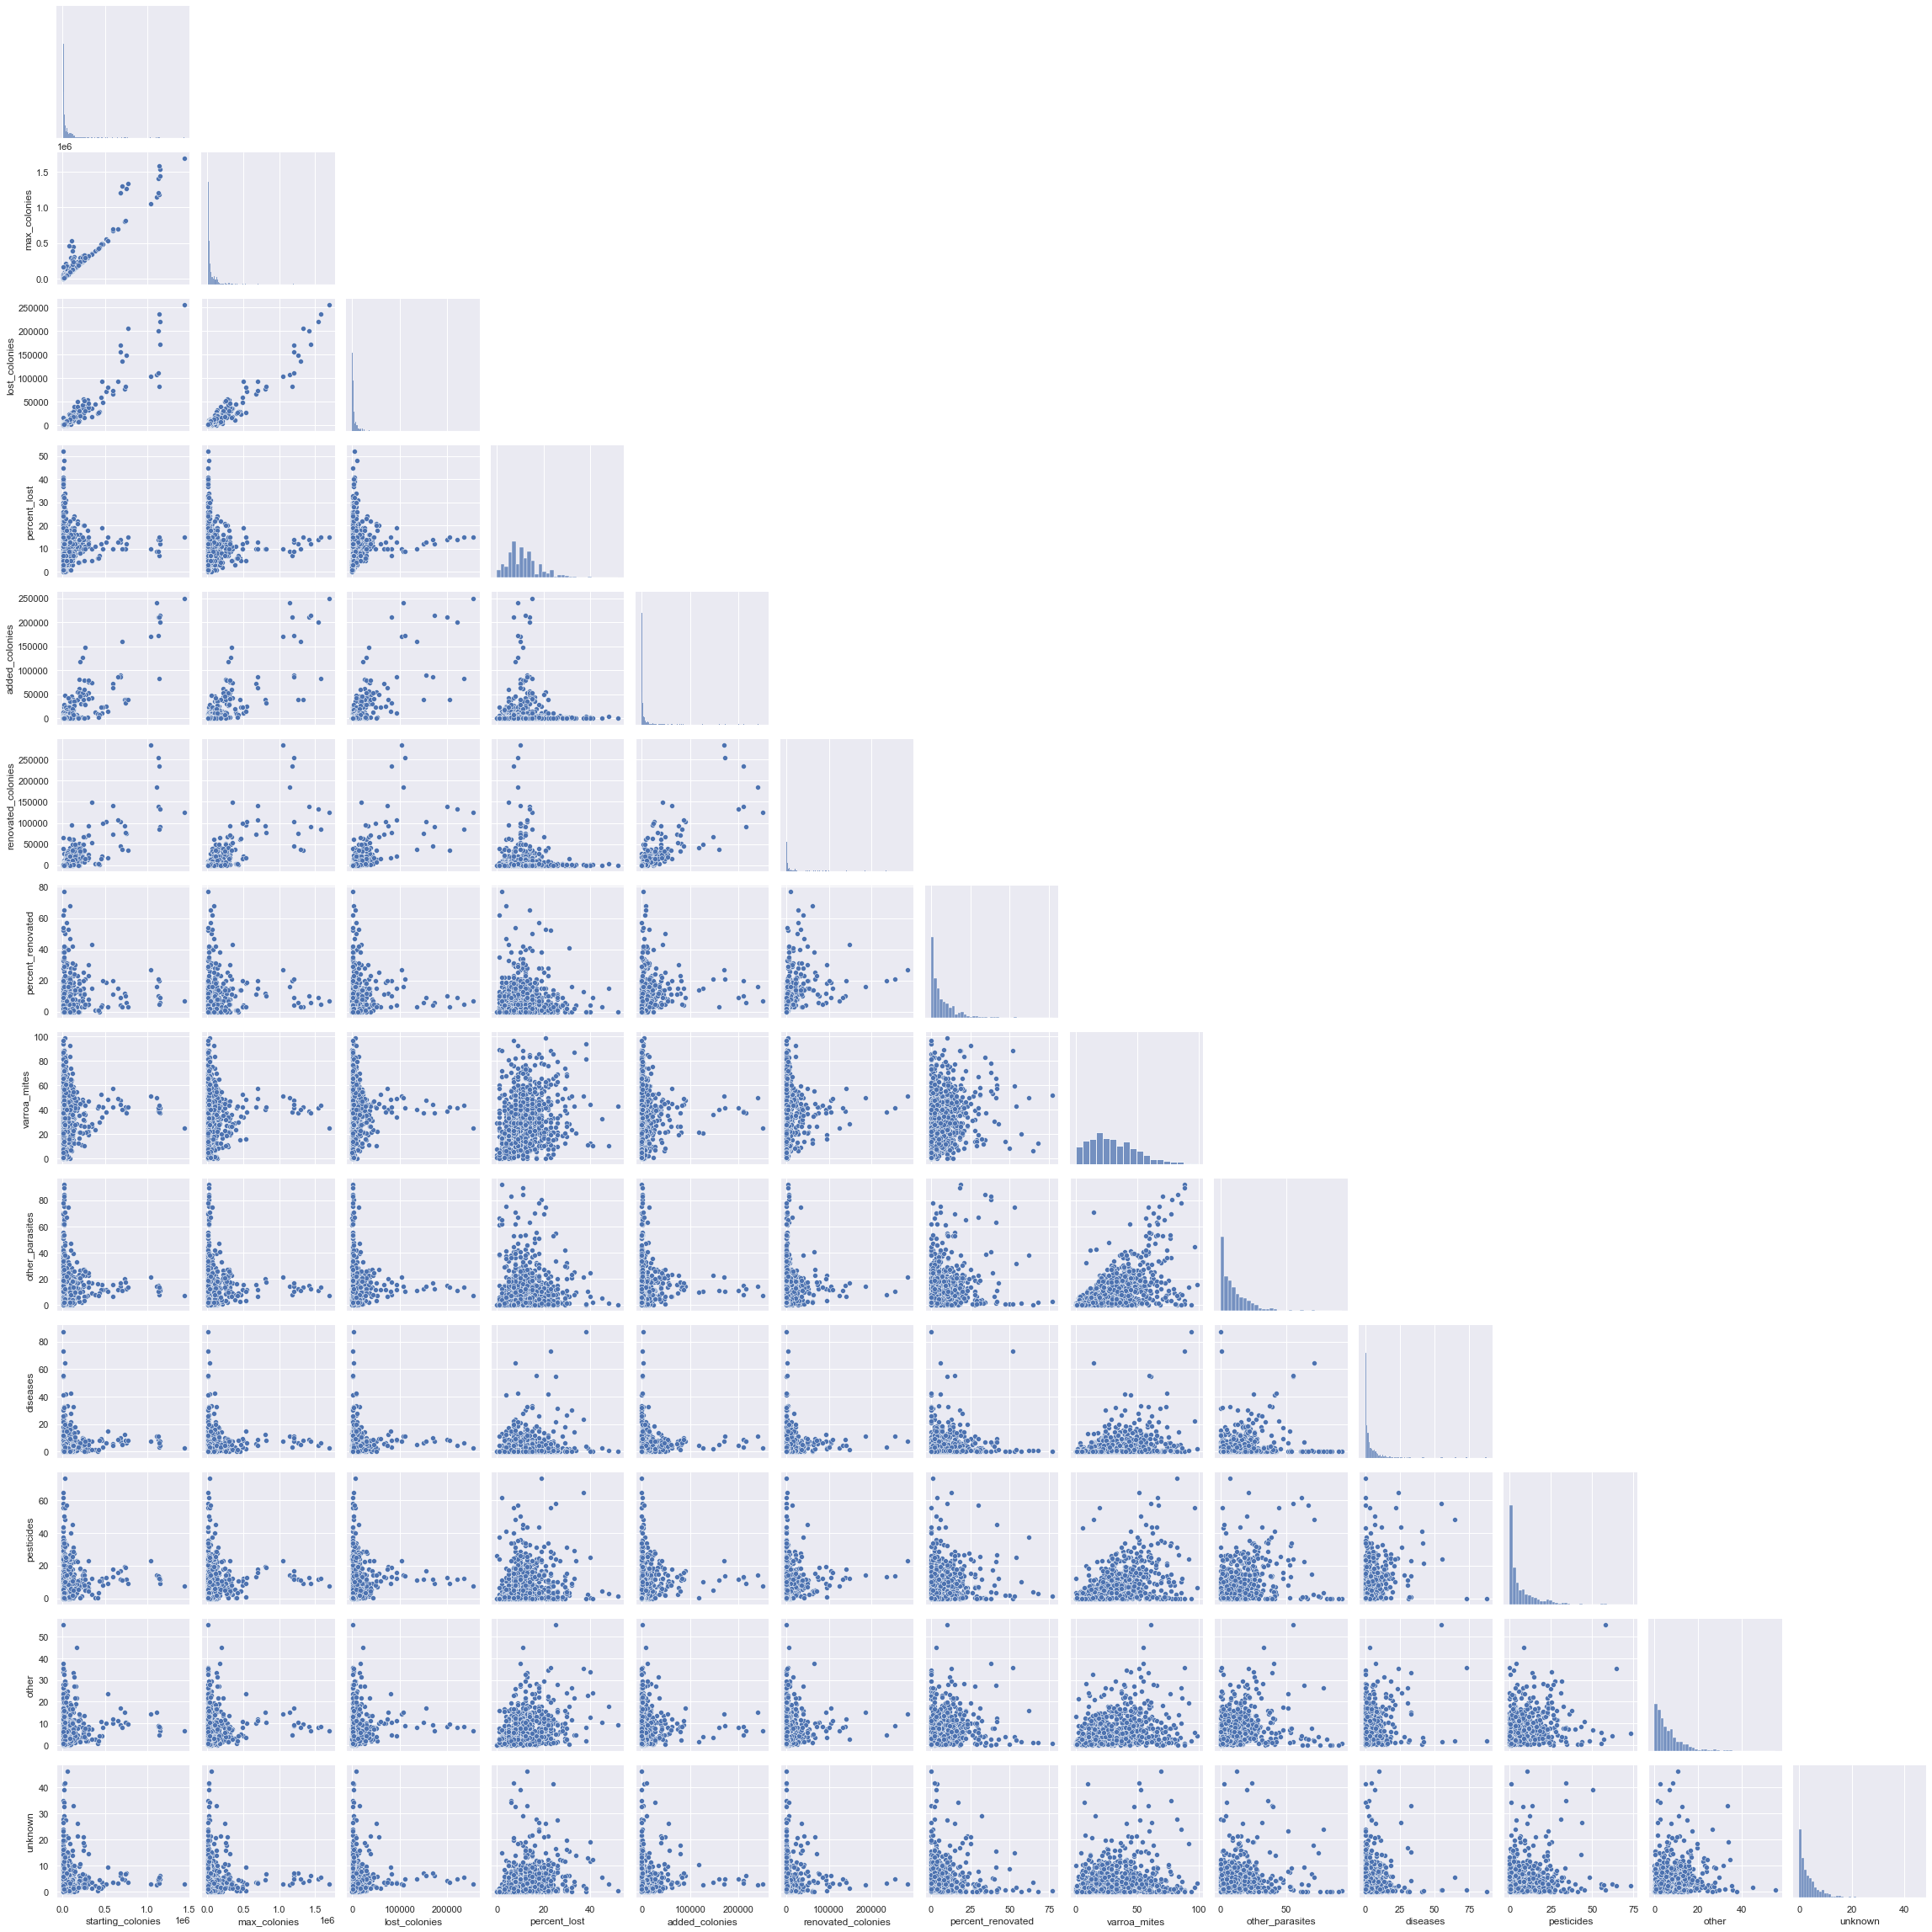

In [37]:
sns.pairplot(train, corner=True)

In [38]:
train_time = train.set_index('start_date').sort_index()

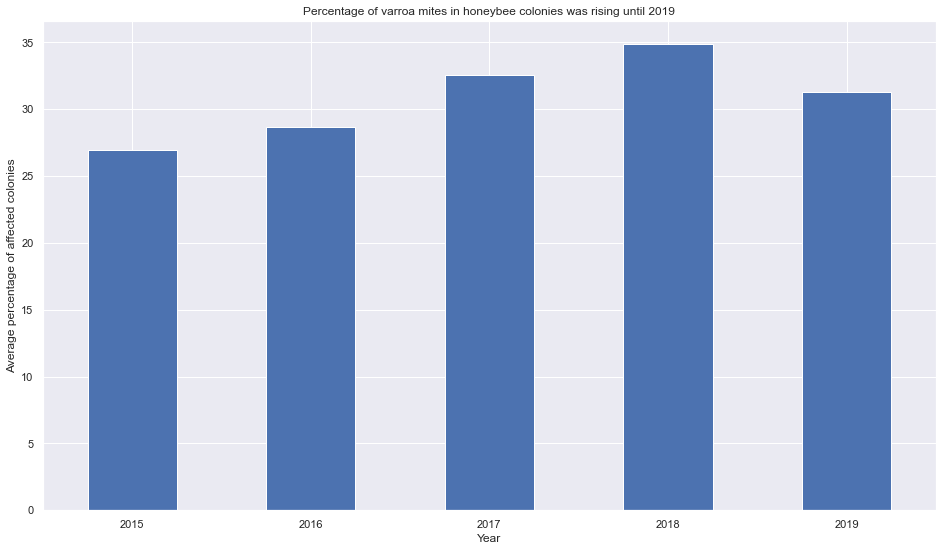

In [39]:
train_time.resample('Y').varroa_mites.mean().plot.bar(figsize=[16,9])
plt.xticks(ticks=[0,1,2,3,4], labels=[2015,2016,2017,2018,2019], rotation=0)
plt.xlabel('Year')
plt.ylabel('Average percentage of affected colonies')
plt.title('Percentage of varroa mites in honeybee colonies was rising until 2019')
plt.show()

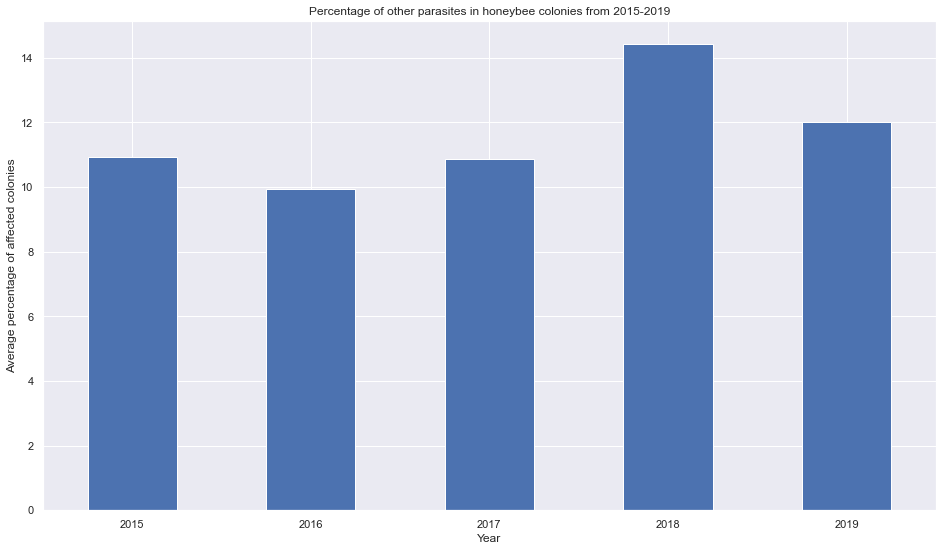

In [40]:
train_time.resample('Y').other_parasites.mean().plot.bar(figsize=[16,9])
plt.xticks(ticks=[0,1,2,3,4], labels=[2015,2016,2017,2018,2019], rotation=0)
plt.xlabel('Year')
plt.ylabel('Average percentage of affected colonies')
plt.title('Percentage of other parasites in honeybee colonies from 2015-2019')
plt.show()

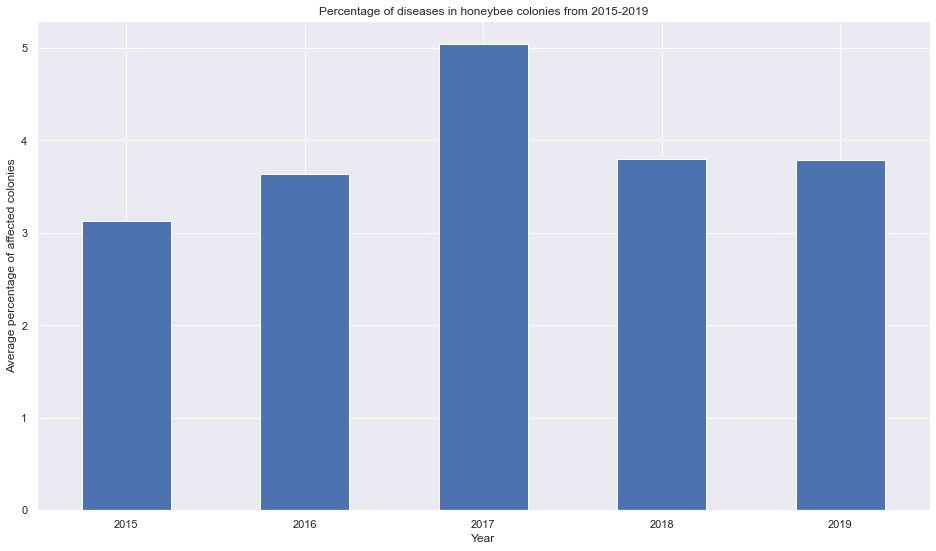

In [41]:
train_time.resample('Y').diseases.mean().plot.bar(figsize=[16,9])
plt.xticks(ticks=[0,1,2,3,4], labels=[2015,2016,2017,2018,2019], rotation=0)
plt.xlabel('Year')
plt.ylabel('Average percentage of affected colonies')
plt.title('Percentage of diseases in honeybee colonies from 2015-2019')
plt.show()

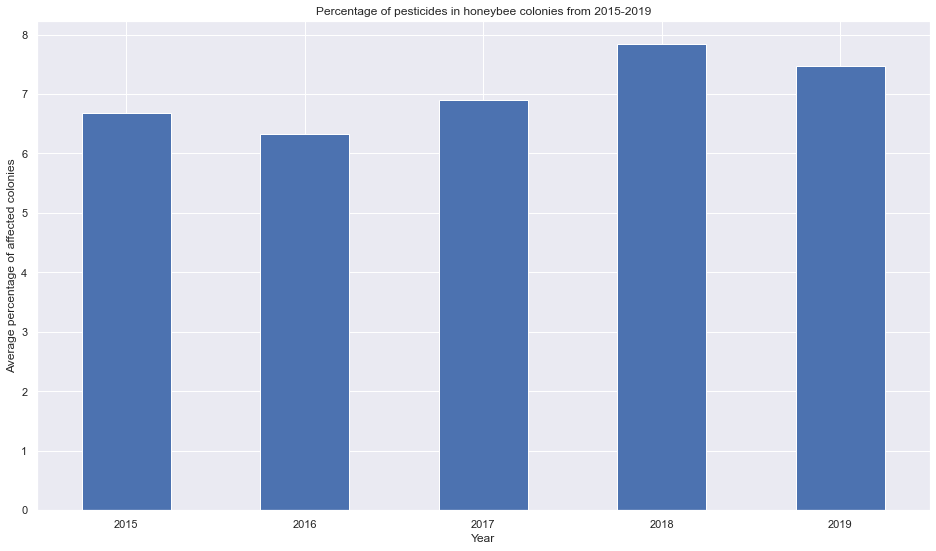

In [42]:
train_time.resample('Y').pesticides.mean().plot.bar(figsize=[16,9])
plt.xticks(ticks=[0,1,2,3,4], labels=[2015,2016,2017,2018,2019], rotation=0)
plt.xlabel('Year')
plt.ylabel('Average percentage of affected colonies')
plt.title('Percentage of pesticides in honeybee colonies from 2015-2019')
plt.show()

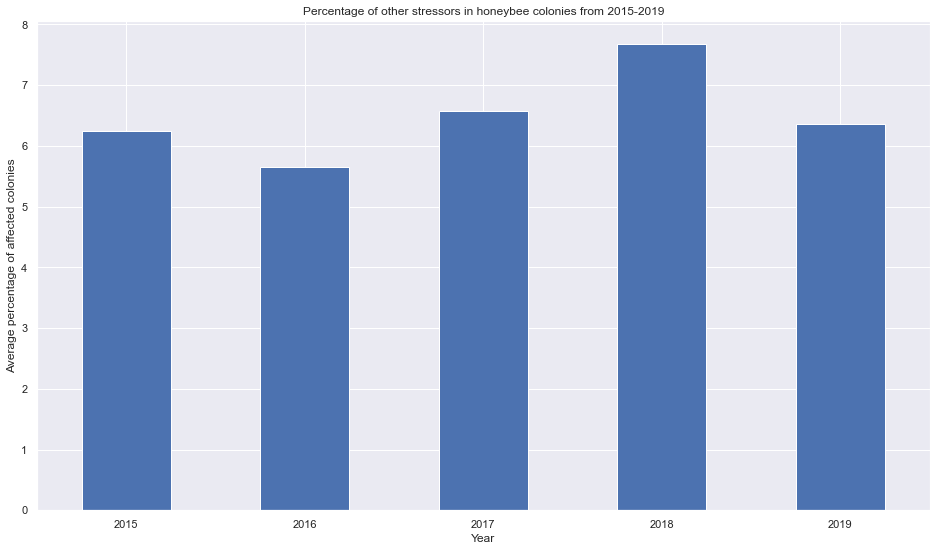

In [43]:
train_time.resample('Y').other.mean().plot.bar(figsize=[16,9])
plt.xticks(ticks=[0,1,2,3,4], labels=[2015,2016,2017,2018,2019], rotation=0)
plt.xlabel('Year')
plt.ylabel('Average percentage of affected colonies')
plt.title('Percentage of other stressors in honeybee colonies from 2015-2019')
plt.show()

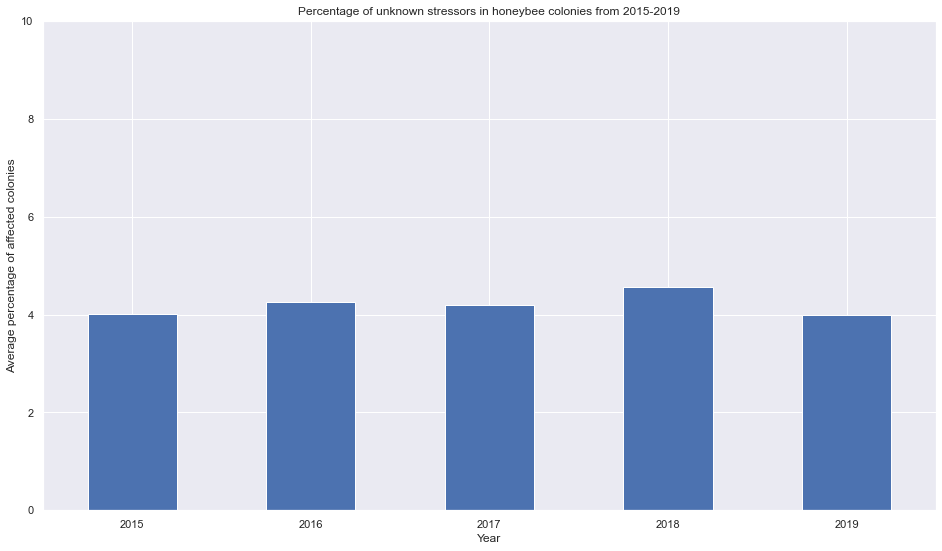

In [44]:
train_time.resample('Y').unknown.mean().plot.bar(figsize=[16,9])
plt.xticks(ticks=[0,1,2,3,4], labels=[2015,2016,2017,2018,2019], rotation=0)
plt.xlabel('Year')
plt.ylabel('Average percentage of affected colonies')
plt.title('Percentage of unknown stressors in honeybee colonies from 2015-2019')
plt.ylim(ymin=0, ymax=10)
plt.show()

(0.0, 50000.0)

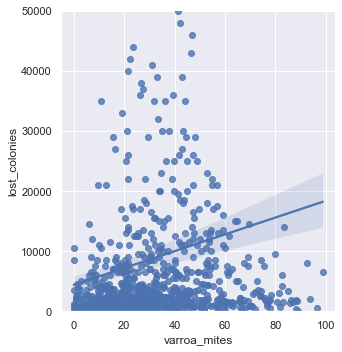

In [45]:
sns.lmplot(x='varroa_mites', y='lost_colonies', data=train_time)
plt.ylim(ymin=0,ymax=50000)

(0.0, 50000.0)

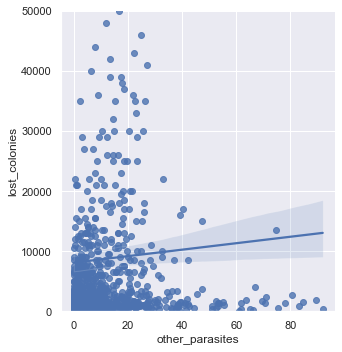

In [46]:
sns.lmplot(x='other_parasites', y='lost_colonies', data=train_time)
plt.ylim(ymin=0,ymax=50000)

(0.0, 50000.0)

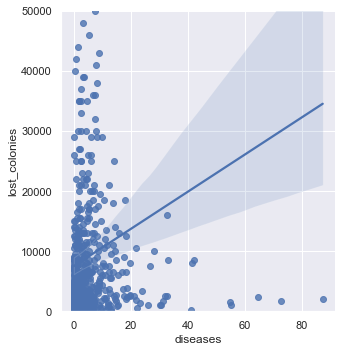

In [47]:
sns.lmplot(x='diseases', y='lost_colonies', data=train_time)
plt.ylim(ymin=0,ymax=50000)

(0.0, 50000.0)

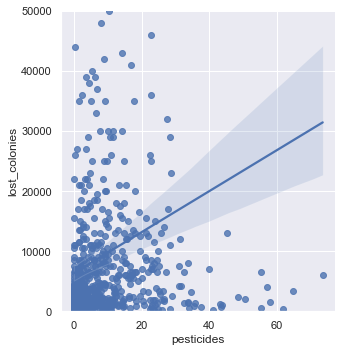

In [48]:
sns.lmplot(x='pesticides', y='lost_colonies', data=train_time)
plt.ylim(ymin=0,ymax=50000)

(0.0, 50000.0)

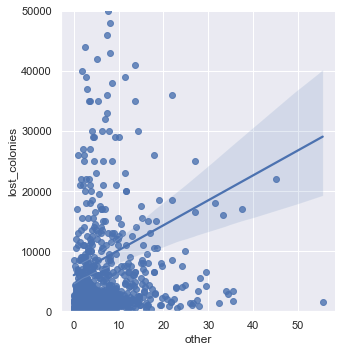

In [49]:
sns.lmplot(x='other', y='lost_colonies', data=train_time)
plt.ylim(ymin=0,ymax=50000)

(0.0, 50000.0)

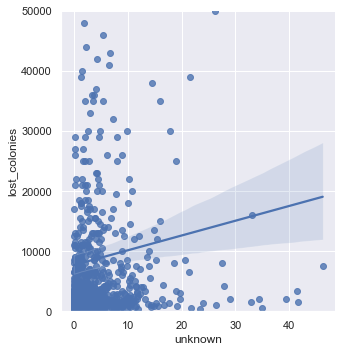

In [50]:
sns.lmplot(x='unknown', y='lost_colonies', data=train_time)
plt.ylim(ymin=0,ymax=50000)

In [51]:
train_time.resample('Y').count()

,state,end_date,starting_colonies,max_colonies,lost_colonies,percent_lost,added_colonies,renovated_colonies,percent_renovated,varroa_mites,other_parasites,diseases,pesticides,other,unknown
start_date,,,,,,,,,,,,,,,
2015-12-31,184,184,184,184,184,184,184,184,184,184,184,184,184,184,184
2016-12-31,184,184,184,184,184,184,184,184,184,184,184,184,184,184,184
2017-12-31,184,184,184,184,184,184,184,184,184,184,184,184,184,184,184
2018-12-31,184,184,184,184,184,184,184,184,184,184,184,184,184,184,184
2019-12-31,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138


In [52]:
test_time = test.set_index('start_date').sort_index()

In [53]:
test_time.resample('Y').count()

,state,end_date,starting_colonies,max_colonies,lost_colonies,percent_lost,added_colonies,renovated_colonies,percent_renovated,varroa_mites,other_parasites,diseases,pesticides,other,unknown
start_date,,,,,,,,,,,,,,,
2020-12-31,184,184,184,184,184,184,184,184,184,184,184,184,184,184,184
2021-12-31,184,184,184,184,184,184,184,184,184,184,184,184,184,184,184
2022-12-31,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92


In [54]:
dfst_time = df_states.set_index('end_date').sort_index()

In [55]:
df

,state,start_date,end_date,starting_colonies,max_colonies,lost_colonies,percent_lost,added_colonies,renovated_colonies,percent_renovated,varroa_mites,other_parasites,diseases,pesticides,other,unknown
0,alabama,2015-01-01,2015-03-31,7000,7000,1800,26,2800,250,4,10.0,5.4,0.0,2.2,9.1,9.4
1,arizona,2015-01-01,2015-03-31,35000,35000,4600,13,3400,2100,6,26.9,20.5,0.1,0.0,1.8,3.1
2,arkansas,2015-01-01,2015-03-31,13000,14000,1500,11,1200,90,1,17.6,11.4,1.5,3.4,1.0,1.0
3,california,2015-01-01,2015-03-31,1440000,1690000,255000,15,250000,124000,7,24.7,7.2,3.0,7.5,6.5,2.8
4,colorado,2015-01-01,2015-03-31,3500,12500,1500,12,200,140,1,14.6,0.9,1.8,0.6,2.6,5.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1358,west_virginia,2022-04-01,2022-06-30,5000,7500,260,3,2400,2600,35,13.1,7.4,3.6,0.0,1.0,0.9
1359,wisconsin,2022-04-01,2022-06-30,52000,62000,1600,3,6000,1300,2,27.0,14.6,4.9,11.8,9.6,6.0
1360,wyoming,2022-04-01,2022-06-30,8000,23000,1900,8,4500,1800,8,5.6,2.5,5.1,0.0,3.0,1.0
1361,other_st,2022-04-01,2022-06-30,4390,4690,120,3,900,400,9,7.9,3.8,4.5,2.1,3.0,4.1


In [56]:
df.to_csv('bee_stressors.csv')

In [57]:
def split_data(df):
    '''This function takes in a dataframe and returns three dataframes, a training dataframe with 60 percent 
        of the data, a validate dataframe with 20 percent of the data and test dataframe with 20 percent of the data.'''
    # split data into train and test with a test size of 20 percent and random state of 825
    train, test = train_test_split(df, test_size=.2, random_state=825)
    # split train again into train and validate with a validate size of 25 percent of train
    train, validate = train_test_split(train, test_size=.25, random_state=825)
    # return three dataframes, 60/20/20 split
    return train, validate, test

In [58]:
train, validate, test = split_data(df)

In [59]:
train.shape, validate.shape, test.shape

((817, 16), (273, 16), (273, 16))

(0.0, 50000.0)

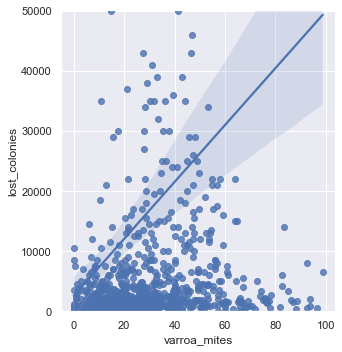

In [60]:
sns.lmplot(x='varroa_mites', y='lost_colonies', data=train)
plt.ylim(ymin=0, ymax=50000)

(0.0, 50000.0)

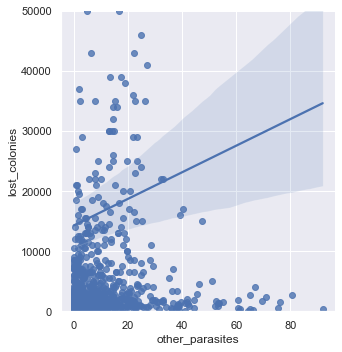

In [61]:
sns.lmplot(x='other_parasites', y='lost_colonies', data=train)
plt.ylim(ymin=0, ymax=50000)

(0.0, 50000.0)

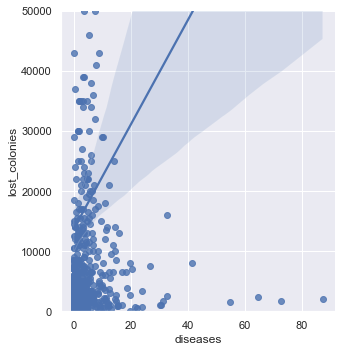

In [62]:
sns.lmplot(x='diseases', y='lost_colonies', data=train)
plt.ylim(ymin=0, ymax=50000)

(0.0, 50000.0)

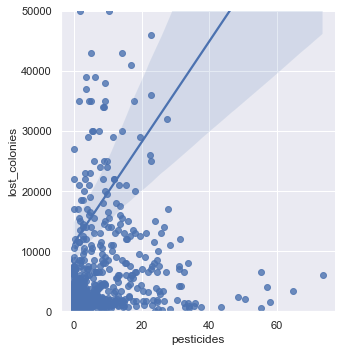

In [63]:
sns.lmplot(x='pesticides', y='lost_colonies', data=train)
plt.ylim(ymin=0, ymax=50000)

(0.0, 50000.0)

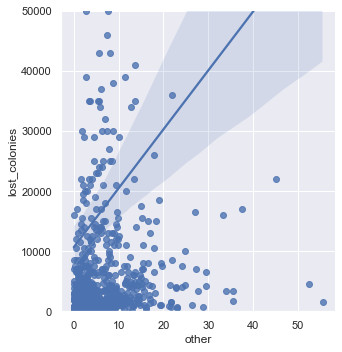

In [64]:
sns.lmplot(x='other', y='lost_colonies', data=train)
plt.ylim(ymin=0, ymax=50000)

(0.0, 50000.0)

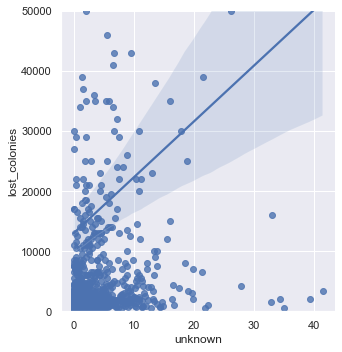

In [65]:
sns.lmplot(x='unknown', y='lost_colonies', data=train)
plt.ylim(ymin=0, ymax=50000)

In [66]:
alpha = .05

In [75]:
corr, p = stats.pearsonr(train.varroa_mites, train.lost_colonies)
corr, p

(0.1474420096095082, 2.3259414993616828e-05)

In [69]:
corr, p = stats.pearsonr(train.other_parasites, train.lost_colonies)
corr, p

(0.046872181755895276, 0.18075241792112134)

In [71]:
corr, p = stats.pearsonr(train.diseases, train.lost_colonies)
corr, p

(0.0949799297602289, 0.006591265669742133)

In [72]:
corr, p = stats.pearsonr(train.pesticides, train.lost_colonies)
corr, p

(0.12598952757951523, 0.0003061190518486632)

In [73]:
corr, p = stats.pearsonr(train.other, train.lost_colonies)
corr, p

(0.10347743842478863, 0.0030650112633980767)

In [74]:
corr, p = stats.pearsonr(train.unknown, train.lost_colonies)
corr, p

(0.0756776388599547, 0.03054883978838356)